In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import exp 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from scipy.integrate import odeint

# Question 1

In [9]:
E_Na,E_K,E_L = (115 , -12 , 10.6)
g_Na,g_K,g_L = (120, 36, 0.3 )
C = 1
dt = 0.001 

In [10]:
def get_n(n,u,dt):
    alpha =  (0.1 - 0.01*u) / (exp(1- 0.1*u) - 1 )
    beta = 0.125*exp(-u/80)
    return n + (alpha*(1-n) - beta*n)*dt

def get_m(n,u,dt):
    alpha =  (2.5 - 0.1*u) / (exp(2.5- 0.1*u) - 1 )
    beta = 4*exp(-u/18)
    return n + (alpha*(1-n) - beta*n)*dt

def get_h(n,u,dt):
    alpha = 0.07*exp(-u/20) 
    beta = 1 / (exp(3- 0.1*u) + 1 )
    return n + (alpha*(1-n) - beta*n)*dt

def getU(u,n,m,h,I0,dt,C):
    return u + C*dt*(-g_L*(u-E_L)   -g_Na*m**3*h*(u-E_Na) -g_K*n**4*(u-E_K)  +I0)

In [11]:
def plot(u,I0,powerSteps):
    n = 0.0
    m = 0.04
    h = 0.6
    steps = 10**powerSteps
    uData= np.zeros(steps)

    
    for i in range(steps):
        uData[i] = u 
        n = get_n(n,u,dt)
        m = get_m(m,u,dt)
        h = get_h(h,u,dt)
        u = getU(u,n,m,h,I0,dt,C)
    plt.plot(np.arange(steps), uData)
    return()



## It starts to spike for initia potential bigger than -117

()

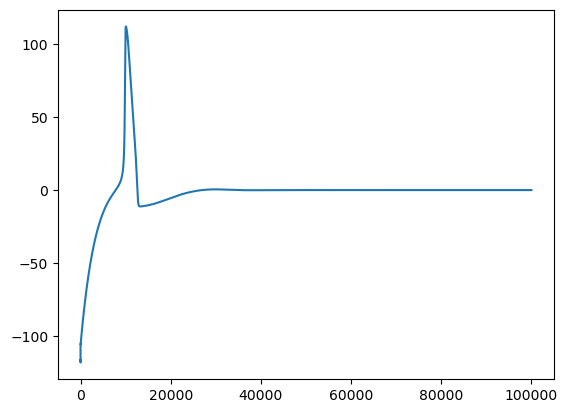

In [15]:
# interact(plot,u=(-200,0),I0=0,powerSteps=(4,8))
plot(-117,0,5)

### If we change u0 20% more than thershould, we have: 

()

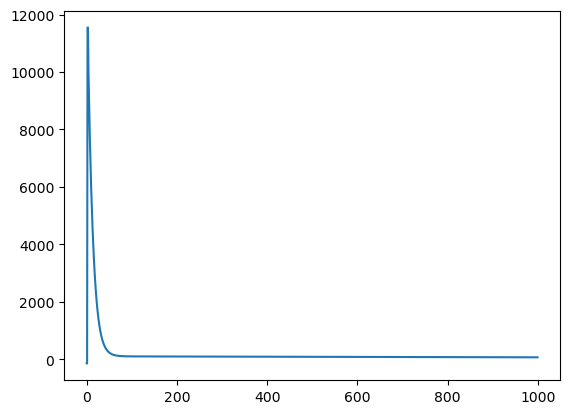

In [24]:
# interact(plot,u=(-200,0),I0=0,powerSteps=(3,8))
plot(-147,0,3)

## It starts to repeat the spikes with the conditions as: u0 = 0 and I0 = 6.25

()

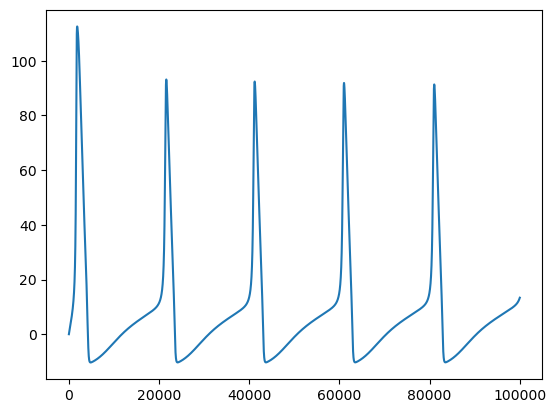

In [32]:
# interact(plot,u=(-200,0),I0=np.linspace(6,6.5,20),powerSteps=(4,8))
plot(0,6.25,5)

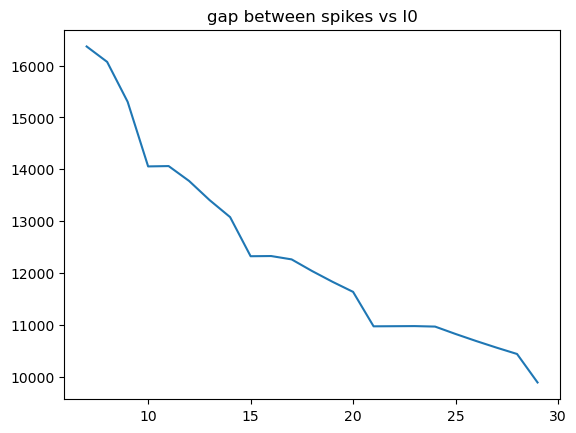

In [22]:
dis = []
for I0 in range(7,30):
    u = 0 
    steps = 100_000
    uData= np.zeros(steps)
    E_Na,E_K,E_L = (115 , -12 , 10.6)
    g_Na,g_K,g_L = (120, 36, 0.3 )
    C = 1
    n = 0.0
    m = 0.04
    h = 0.6
    dt = 0.001 

    for i in range(steps):
        uData[i] = u 
        n = get_n(n,u,dt)
        m = get_m(m,u,dt)
        h = get_h(h,u,dt)
        u = getU(u,n,m,h,I0,dt,C)

    maxes = np.argwhere(np.logical_and(uData >= np.roll(uData,-1),uData >= np.roll(uData,1)))
    dis.append(np.mean(maxes[1:] - maxes[:-1]))

plt.title("gap between spikes vs I0")
plt.plot(np.arange(7,30),dis)
plt.show()

# Question 2 

## In oder to do that, we add a Ca channel, with $ g_{Ca} = 100 $ , $E_{Ca} = 120.0 $ ,$\tau_{Ca} = 80.0 $ and $\gamma_{Ca} = 0.1 $; which because of long time constant compared to others it only shoes off in reducing the time gap between the spikes. the final equation will be:
$C_{m}\frac{dV}{dt}=I_{ext}−(I_{Na}+I_{K}+I_{L}+I_{Ca})$
$ I_{Ca}=g_{Ca}m_{Ca}^{p}(V−E_{Ca})$​

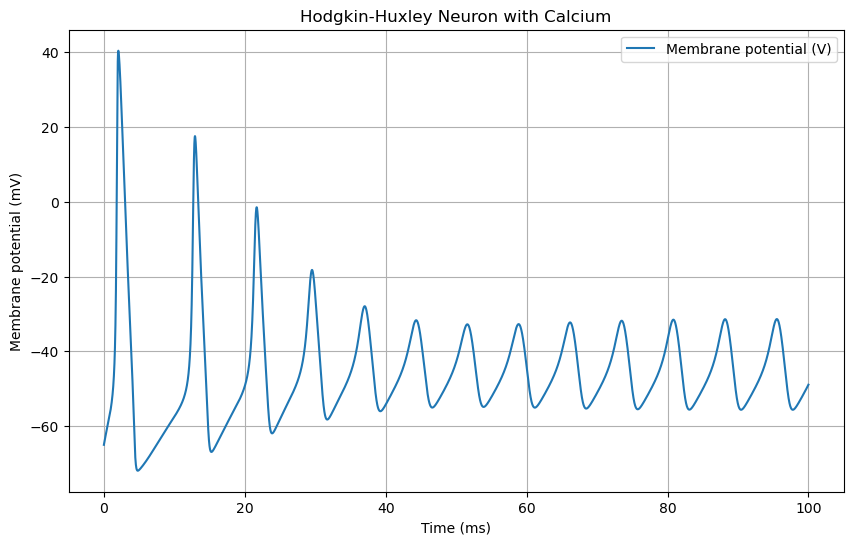

In [27]:
C_m = 1.0 
g_Na = 120.0  
g_K = 36.0
g_L = 0.3
g_Ca = 100 

E_Na = 50.0  
E_K = -77.0
E_L = -54.387
E_Ca = 120.0  

V_rest = -65.0  


tau_Ca = 80.0  
gamma_Ca = 0.1  


Tmax = 100  
dt = 0.01
time = np.arange(0, Tmax, dt)


I_ext = 10.0 



def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1.0 / (1 + np.exp(-(V + 35) / 10))

def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

def m_inf(V):
    return alpha_m(V) / (alpha_m(V) + beta_m(V))

def h_inf(V):
    return alpha_h(V) / (alpha_h(V) + beta_h(V))

def n_inf(V):
    return alpha_n(V) / (alpha_n(V) + beta_n(V))

def tau_m(V):
    return 1 / (alpha_m(V) + beta_m(V))

def tau_h(V):
    return 1 / (alpha_h(V) + beta_h(V))

def tau_n(V):
    return 1 / (alpha_n(V) + beta_n(V))

def m_Ca_inf(V):
    return 1.0 / (1 + np.exp(-(V + 20) / 9))

def tau_m_Ca(V):
    return 50.0  


def dALLdt(X, t):
    V, m, h, n, m_Ca, Ca_conc = X

    I_Na = g_Na * m**3 * h * (V - E_Na)

    I_K = g_K * n**4 * (V - E_K)
    
    I_L = g_L * (V - E_L)
    
    I_Ca = g_Ca * m_Ca**2 * (V - E_Ca)
    
    dVdt = (I_ext - (I_Na + I_K + I_L + I_Ca )) / C_m

    dmdt = (m_inf(V) - m) / tau_m(V)
    dhdt = (h_inf(V) - h) / tau_h(V)
    dndt = (n_inf(V) - n) / tau_n(V)
    dm_Cadt = (m_Ca_inf(V) - m_Ca) / tau_m_Ca(V)

    dCa_concdt = -I_Ca / gamma_Ca - Ca_conc / tau_Ca

    return [dVdt, dmdt, dhdt, dndt, dm_Cadt, dCa_concdt]

V0 = V_rest
m0 = m_inf(V_rest)
h0 = h_inf(V_rest)
n0 = n_inf(V_rest)
m_Ca0 = m_Ca_inf(V_rest)
Ca_conc0 = 0.0

X0 = [V0, m0, h0, n0, m_Ca0, Ca_conc0]

sol = odeint(dALLdt, X0, time)

V = sol[:, 0]
m = sol[:, 1]
h = sol[:, 2]
n = sol[:, 3]
m_Ca = sol[:, 4]
Ca_conc = sol[:, 5]

plt.figure(figsize=(10, 6))
plt.plot(time, V, label='Membrane potential (V)')
plt.title('Hodgkin-Huxley Neuron with Calcium')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.grid()
plt.show()


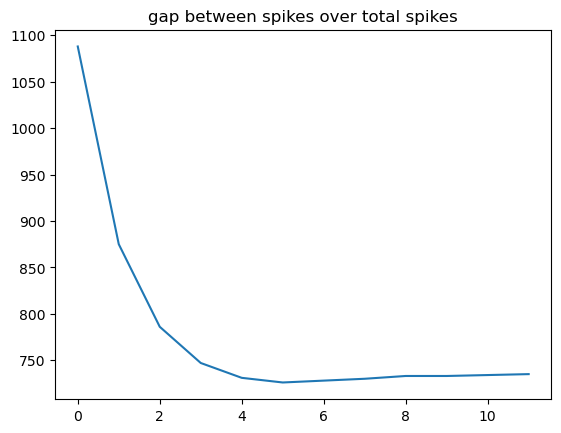

In [28]:
maxes = np.argwhere(np.logical_and(V >= np.roll(V,-1),V >= np.roll(V,1)))[:-1]
ISI = maxes[1:] - maxes[:-1]
plt.title("gap between spikes over total spikes")
plt.plot(np.arange(len(ISI)),ISI)


## 1. Calcium Channel Dynamics

### Voltage-Dependent Activation
The calcium current is modeled as a voltage-gated current, similar to sodium (Na⁺) and potassium (K⁺) channels. The **activation variable** $ m_{\text{Ca}} $ governs the opening of the calcium channels and depends on the membrane voltage \( V \).

The steady-state activation of the calcium channel is given by:

$
m_{\text{Ca,inf}}(V) = \frac{1}{1 + \exp\left(\frac{-(V + 20)}{9}\right)}
$

This function describes how the fraction of open calcium channels changes with the membrane potential. It is a **sigmoidal curve**, meaning calcium channels open more as the membrane depolarizes.

### Activation Time Constant
The time constant $ \tau_{m_{\text{Ca}}} $ determines how quickly the calcium channel reaches its steady state:

$
\tau_{m_{\text{Ca}}} = 80 \, \text{s}
$

This reduced time constant allows the calcium channels to open slowly during depolarization

## 2. Calcium Current ($ I_{\text{Ca}} $)

Once the calcium channels open, calcium ions flow into the neuron, contributing to an inward depolarizing current. The calcium current is:

$
I_{\text{Ca}} = g_{\text{Ca}} m_{\text{Ca}}^2 (V - E_{\text{Ca}})
$

Where:
- $ g_{Ca} $ is the maximum calcium conductance.
- $ E_{Ca} $ is the calcium reversal potential (+120 mV).

The inward calcium current helps depolarize the neuron, making it easier to reach the spiking threshold.

## 3. Intracellular Calcium Concentration

The calcium current also affects the intracellular calcium concentration, which activates calcium-dependent potassium channels. The calcium concentration changes according to:

$
\frac{d[\text{Ca}^{2+}]}{dt} = -\frac{I_{\text{Ca}}}{\gamma_{\text{Ca}}} - \frac{[\text{Ca}^{2+}]}{\tau_{\text{Ca}}}
$

Where:
- $ \gamma_{\text{Ca}} $ converts the calcium current into intracellular calcium concentration.
- $ \tau_{\text{Ca}} $ is the calcium decay time constant.

- **Membrane voltage dynamics**:
$
\frac{dV}{dt} = \frac{I_{\text{ext}} - (I_{\text{Na}} + I_{\text{K}} + I_{\text{L}} + I_{\text{Ca}} + I_{\text{K,slow}})}{C_m}
$

